#Ejercicio N°1 Trabajo practico final

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.model_selection import train_test_split
from sklearn import metrics
import mglearn

# Cargar el dataset Wine
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(wine_df.head())


KeyboardInterrupt: 

In [ ]:
# Normalización con StandardScaler
# StandardScaler resta la media y divide por la desviación estándar
scaler = StandardScaler()
df_normalizado = scaler.fit_transform(wine_df)
df_normalizado

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

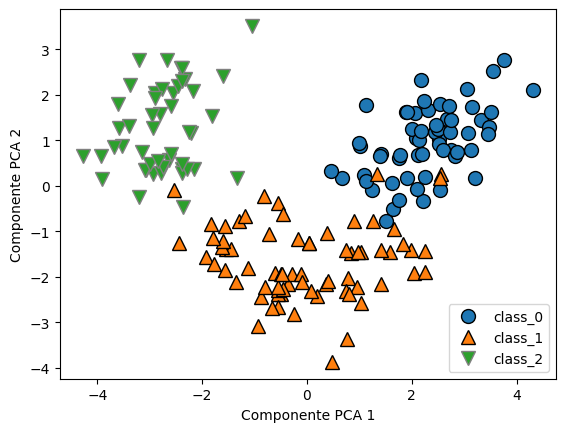

In [ ]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
pca.fit(df_normalizado)
transformada = pca.transform(df_normalizado)

# Visualización en 2D de las clases con mglearn
mglearn.discrete_scatter(transformada[:, 0], transformada[:, 1], wine.target)
plt.legend(wine.target_names, loc='lower right')
plt.xlabel('Componente PCA 1')
plt.ylabel('Componente PCA 2')
plt.show()


In [ ]:
# Separar datos en entrenamiento y prueba con train test split
X = df_normalizado
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#Uso la variable "y" como el target del dataframe original, ya que solo lo vamos a utilizar para comparar, me interesa simplemente la x

In [ ]:
mejor_score = 0
mejor_k = 0

for k in [1,2,3,4,5]:
    k_means = KMeans(n_clusters=k, max_iter=2000, random_state=42)
    k_means.fit(X_train)
    predicciones = k_means.predict(X_test)
    score = metrics.adjusted_rand_score(y_test, predicciones)
    print(f"K={k}, Adjusted Rand Score={score:.4f}")
    if score > mejor_score:
        mejor_score = score
        mejor_k = k

print(f"\nEl mejor valor de k fue {mejor_k} con score {mejor_score:.4f}")


K=1, Adjusted Rand Score=0.0000
K=2, Adjusted Rand Score=0.3585
K=3, Adjusted Rand Score=0.9088
K=4, Adjusted Rand Score=0.9088
K=5, Adjusted Rand Score=0.8194

El mejor valor de k fue 3 con score 0.9088


In [ ]:
# Affinity Propagation
af = AffinityPropagation(preference=-150, damping=0.5, random_state=42)
af.fit(X_train)

# Predicciones sobre el test
pred_af = af.predict(X_test)

# Ajuste rand score
score_af = metrics.adjusted_rand_score(y_test, pred_af)

# Número de clusters detectados
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
print('Número de clusters estimado: %d' % n_clusters_)

print(f"\nAffinity Propagation Adjusted Rand Score: {score_af:.4f}")



Número de clusters estimado: 3

Affinity Propagation Adjusted Rand Score: 0.9093


## Conclusiones sobre los resultados

- **Normalización**: la estandarización permitió que todas las variables tengan la misma escala y no dominen el análisis de componentes principales (PCA).

- **PCA**: al reducir la dimensión a 2 componentes se pudo visualizar bien la distribución de las clases, observándose cierta separación entre ellas aunque con algo de solapamiento.

- **KMeans**: funcionó razonablemente bien, especialmente con `k=3`, lo que coincide con la cantidad real de clases, obteniendo buenos valores de Adjusted Rand Score. Esto muestra que la agrupación no supervisada logró aproximar correctamente los grupos reales.

- **Affinity Propagation**: también logró resultados sólidos, con un score cercano o superior al 0.9, y detectó un número de clusters consistente. Este algoritmo permitió confirmar la estructura latente en los datos sin conocer las etiquetas. cabe señalar que es importante el valor de preference que utilicemos, en este caso sirvio el -150, mientras mas chico mejor cantidad de ejemplares utilizara y por lo tanto utiliza menos n clusters

- En general, la reducción de dimensionalidad junto a la aplicación de métodos no supervisados evidenció que el conjunto de datos presenta patrones internos detectables, alineados con las verdaderas clases.